In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data=pd.read_csv("/Users/danielbock/RESULTS_BIG/GP_metrics_summary_64grid.csv")
true_best = data["temperature_kelvin"].max()
true_best

np.float64(500.0)

In [26]:
filtered = data[~data["vext_version"].str.contains("_exp", na=False)]
filtered = filtered[~filtered["vext_version"].str.contains("32grid", na=False)]
filtered

,vext_version,temperature_kelvin,pressure_bar,fold,r2_score,mae,median_abs_rel_dev,n_test_samples
6000,C:\Users\Bock\Desktop\MASTERARBEIT\MASTA\Data_...,300.0,1.0,1,0.444016,0.000321,23.432182,13
6001,C:\Users\Bock\Desktop\MASTERARBEIT\MASTA\Data_...,300.0,1.0,2,0.686027,0.000325,24.111037,13
6002,C:\Users\Bock\Desktop\MASTERARBEIT\MASTA\Data_...,300.0,1.0,3,0.318755,0.000364,17.597323,13
6003,C:\Users\Bock\Desktop\MASTERARBEIT\MASTA\Data_...,300.0,1.0,4,0.432798,0.000293,9.044366,13
6004,C:\Users\Bock\Desktop\MASTERARBEIT\MASTA\Data_...,300.0,1.0,5,0.260134,0.000466,26.115793,13
...,...,...,...,...,...,...,...,...
11245,C:\Users\Bock\Desktop\MASTERARBEIT\MASTA\Data_...,500.0,100.0,6,0.530886,0.000208,9.234752,13
11246,C:\Users\Bock\Desktop\MASTERARBEIT\MASTA\Data_...,500.0,100.0,7,0.770707,0.000252,11.319696,13
11247,C:\Users\Bock\Desktop\MASTERARBEIT\MASTA\Data_...,500.0,100.0,8,0.031054,0.000322,10.470210,12
11248,C:\Users\Bock\Desktop\MASTERARBEIT\MASTA\Data_...,500.0,100.0,9,0.723075,0.000271,15.167161,12


<Figure size 640x480 with 0 Axes>

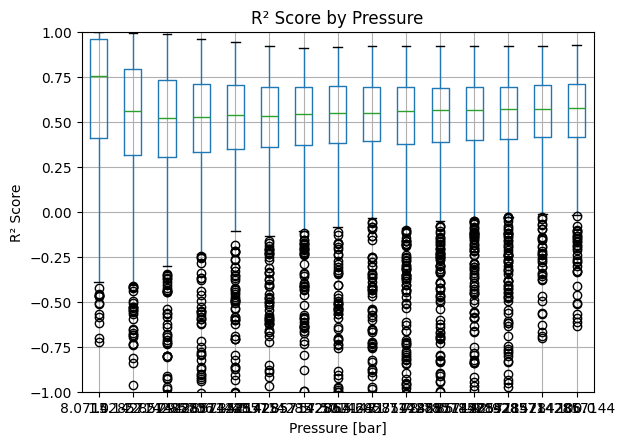

In [27]:
# Boxplot - R2 zu Druck
plt.figure()
data.boxplot(column="r2_score", by="pressure_bar")
plt.title("R² Score by Pressure")
plt.suptitle("")
plt.ylim(-1, 1)
plt.xlabel("Pressure [bar]")
plt.ylabel("R² Score")
plt.show()


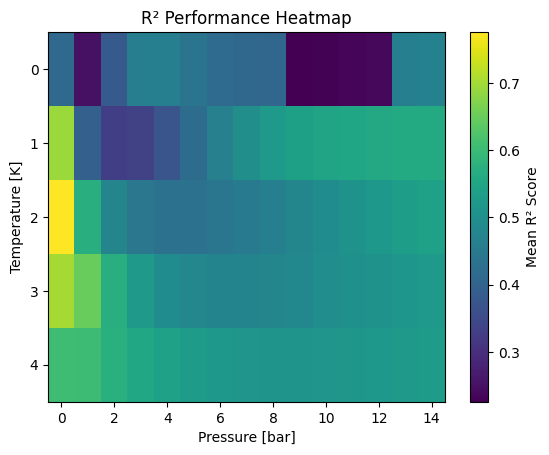

In [28]:
# Heatmap - Welcher Zustand Temperatur/Druck am besten
pivot = data.pivot_table(values="r2_score", index="temperature_kelvin", columns="pressure_bar", aggfunc="mean")
plt.figure()
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Mean R² Score")
plt.xlabel("Pressure [bar]")
plt.ylabel("Temperature [K]")
plt.title("R² Performance Heatmap")
plt.show()


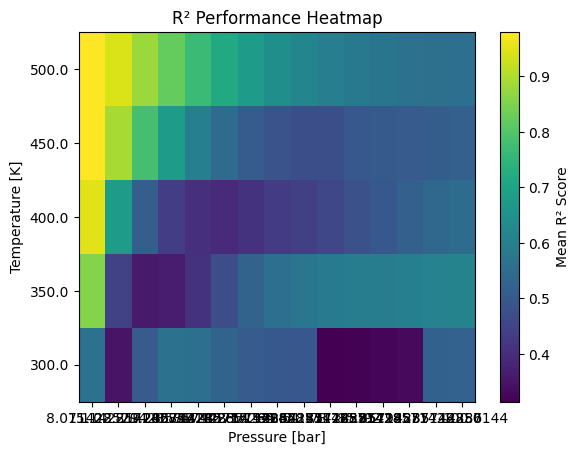

In [29]:
pivot = filtered.pivot_table(values="r2_score", index="temperature_kelvin", columns="pressure_bar", aggfunc="mean")

plt.figure()
plt.imshow(pivot, aspect="auto", origin="lower")
plt.colorbar(label="Mean R² Score")

# Achsenticks richtig setzen:
plt.xticks(ticks=range(len(pivot.columns)), labels=pivot.columns)
plt.yticks(ticks=range(len(pivot.index)), labels=pivot.index)

plt.xlabel("Pressure [bar]")
plt.ylabel("Temperature [K]")
plt.title("R² Performance Heatmap")
plt.show()


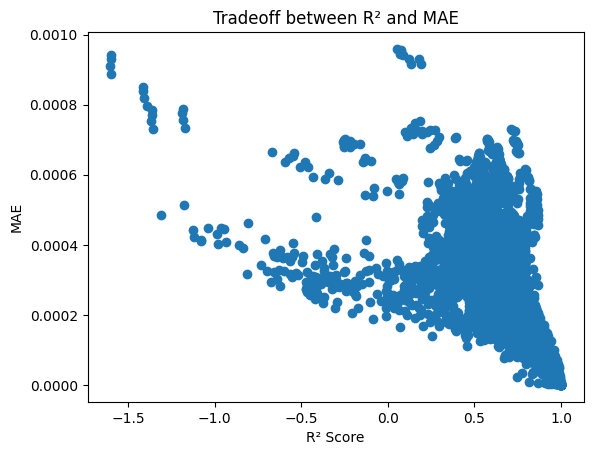

In [20]:
# R2vsMAE aussage?
plt.figure()
plt.scatter(filtered["r2_score"], filtered["mae"])
plt.xlabel("R² Score")
plt.ylabel("MAE")
plt.title("Tradeoff between R² and MAE")
plt.show()


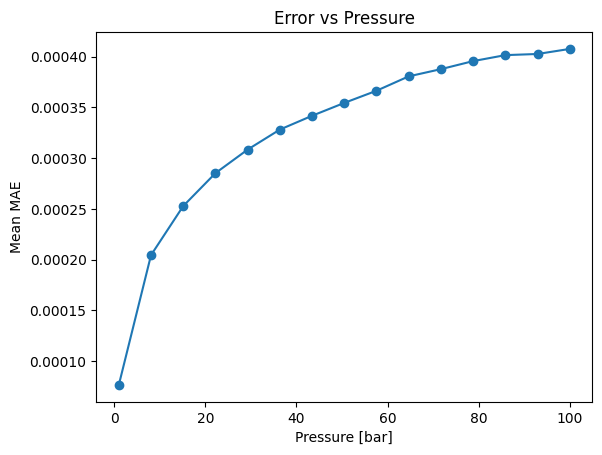

In [21]:
plt.figure()
grouped = filtered.groupby("pressure_bar")["mae"].mean()
plt.plot(grouped.index, grouped.values, marker="o")
plt.xlabel("Pressure [bar]")
plt.ylabel("Mean MAE")
plt.title("Error vs Pressure")
plt.show()


/var/folders/p_/gl5tyfs92yg7lps1mzt8whdc0000gn/T/ipykernel_96010/2969345771.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


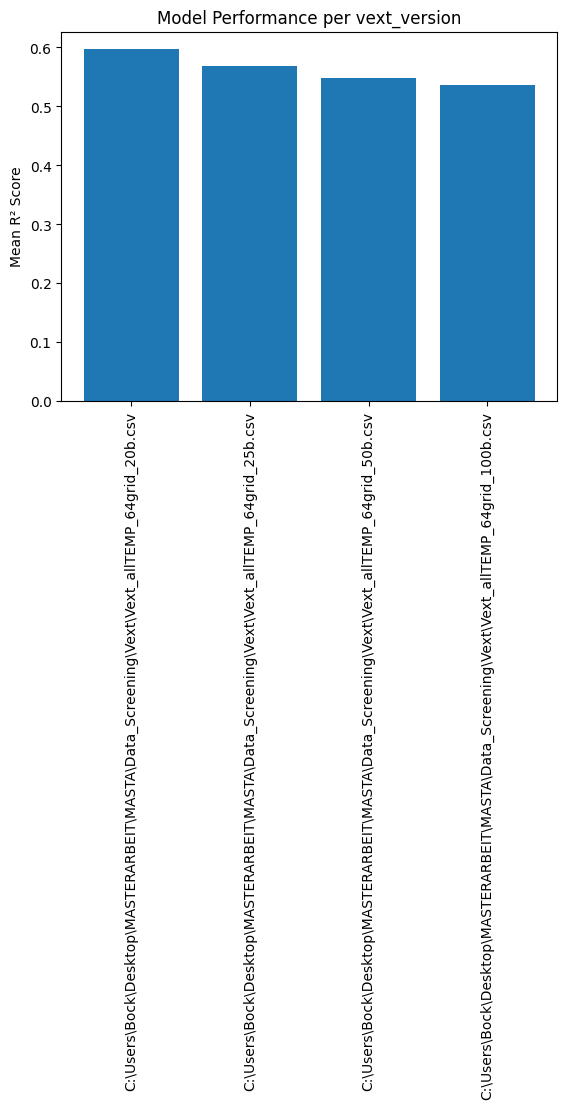

In [22]:
# Mean R2 performance
plt.figure()
grouped = filtered.groupby("vext_version")["r2_score"].mean().sort_values(ascending=False)
plt.bar(grouped.index, grouped.values)
plt.xticks(rotation=90)
plt.ylabel("Mean R² Score")
plt.title("Model Performance per vext_version")
plt.tight_layout()
plt.show()


/var/folders/p_/gl5tyfs92yg7lps1mzt8whdc0000gn/T/ipykernel_96010/2717505229.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1000x400 with 0 Axes>

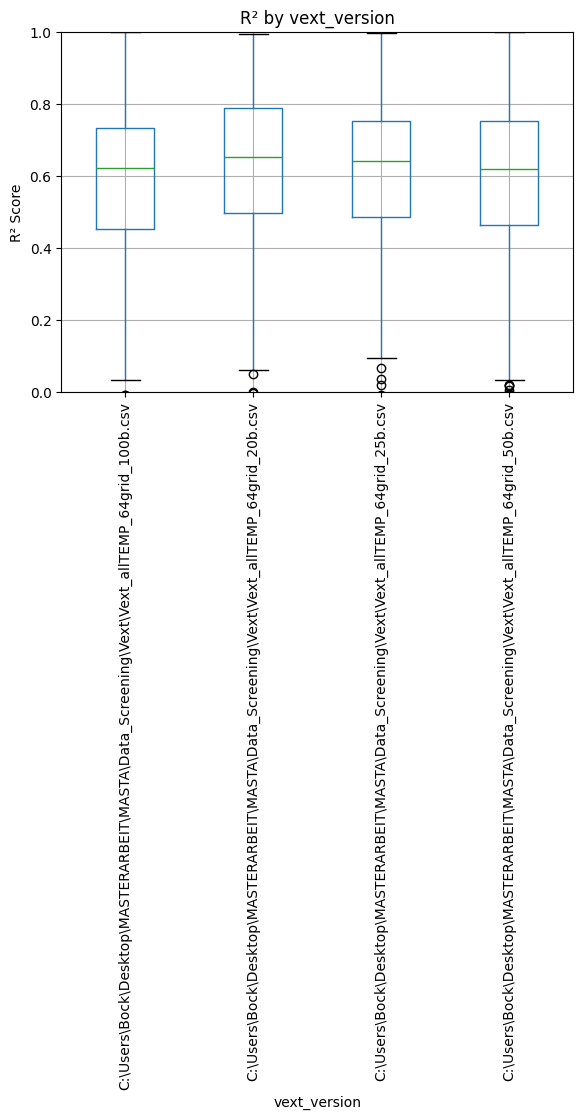

In [23]:
plt.figure(figsize=(10,4))
filtered.boxplot(column="r2_score", by="vext_version")
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.title("R² by vext_version")
plt.suptitle("")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()


In [ ]:
top10 = data.sort_values(by="r2_score", ascending=False).head(10)
print(top10[["vext_version","temperature_kelvin","pressure_bar","r2_score","mae"]])
